In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
%matplotlib inline

### Data Preprocessing and Exploratory Data Analysis

In [2]:
df = pd.read_csv('nyc-rolling-sales.csv')

In [3]:
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [4]:
print(f"Number of columns: {len(df.columns)}")

Number of columns: 22


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

There is no missing data in this dataset and there are **84,548** data entries

In [6]:
uniques = []

for col in df.columns:
    num_uniques = df[col].nunique()
    pct_uniques = round((num_uniques / len(df[col])) * 100,2)
    temp_list = [col, num_uniques, pct_uniques]
    uniques.append(temp_list)
        

In [7]:
from tabulate import tabulate
print(tabulate(uniques, headers=['Column', 'Number of Unique Values', 'Percentage of Unique Values']))

Column                            Number of Unique Values    Percentage of Unique Values
------------------------------  -------------------------  -----------------------------
Unnamed: 0                                          26736                          31.62
BOROUGH                                                 5                           0.01
NEIGHBORHOOD                                          254                           0.3
BUILDING CLASS CATEGORY                                47                           0.06
TAX CLASS AT PRESENT                                   11                           0.01
BLOCK                                               11566                          13.68
LOT                                                  2627                           3.11
EASE-MENT                                               1                           0
BUILDING CLASS AT PRESENT                             167                           0.2
ADDRESS                   

The column, "Unnamed: 0", seems to be some sort of an index column that will be of no use in our analysis so it will be dropped. Also, the column "EASE-MENT" is just a column of empty strings which will be dropped as well.

In [8]:
df.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [9]:
df.drop(['EASE-MENT'], axis = 1, inplace = True)

We can go ahead and delete the duplicate entries in the dataset

In [10]:
df = df.drop_duplicates(df.columns, keep = 'last')
sum(df.duplicated(df.columns))

0

Now, let's check the data types of our columns to check if anything is out of place (i.e. numerical column is a string etc)

In [11]:
df.dtypes

BOROUGH                            int64
NEIGHBORHOOD                      object
BUILDING CLASS CATEGORY           object
TAX CLASS AT PRESENT              object
BLOCK                              int64
LOT                                int64
BUILDING CLASS AT PRESENT         object
ADDRESS                           object
APARTMENT NUMBER                  object
ZIP CODE                           int64
RESIDENTIAL UNITS                  int64
COMMERCIAL UNITS                   int64
TOTAL UNITS                        int64
LAND SQUARE FEET                  object
GROSS SQUARE FEET                 object
YEAR BUILT                         int64
TAX CLASS AT TIME OF SALE          int64
BUILDING CLASS AT TIME OF SALE    object
SALE PRICE                        object
SALE DATE                         object
dtype: object

**LAND SQUARE FEET**, **GROSS SQUARE FEET** AND **SALE PRICE** should be converted to numerical features

In [12]:
print(df['LAND SQUARE FEET'].value_counts())
print()
print(df['GROSS SQUARE FEET'].value_counts())
print()
print(df['SALE PRICE'].value_counts())

 -        26054
0         10297
2000       3882
2500       3455
4000       3018
          ...  
52944         1
8440          1
6035          1
183848        1
10796         1
Name: LAND SQUARE FEET, Length: 6062, dtype: int64

 -       27385
0        11360
2400       380
2000       359
1800       359
         ...  
9720         1
5170         1
14546        1
3145         1
64117        1
Name: GROSS SQUARE FEET, Length: 5691, dtype: int64

 -        14176
0         10012
10          746
450000      427
550000      416
          ...  
842800        1
211500        1
299250        1
436610        1
69300         1
Name: SALE PRICE, Length: 10008, dtype: int64


A significant portion of this dataset have no values (-) for the above three features. In addition, an area or a house sale price of 0 is not reasonable

In [13]:
# 'coerce' sets values that cannot be casted to int or float (for example '-') to np.nan
df['SALE PRICE'] = pd.to_numeric(df['SALE PRICE'], errors='coerce')
df['LAND SQUARE FEET'] = pd.to_numeric(df['LAND SQUARE FEET'], errors='coerce')
df['GROSS SQUARE FEET']= pd.to_numeric(df['GROSS SQUARE FEET'], errors='coerce')

In [14]:
print("Percentage of Missing Data:")
print("GROSS SQUARE FEET:",str((round(sum(df['GROSS SQUARE FEET'].isna()) / len(df),3)*100))[:4]+'%')
print("SALE PRICE:",str(round(sum(df['SALE PRICE'].isna()) / len(df),3)*100)[:4]+'%')
print("LAND SQUARE FEET:",str(round(sum(df['LAND SQUARE FEET'].isna()) / len(df),3)*100)[:4]+'%')

Percentage of Missing Data:
GROSS SQUARE FEET: 32.7%
SALE PRICE: 16.9%
LAND SQUARE FEET: 31.1%


In [15]:
df.groupby('BOROUGH').median()[['GROSS SQUARE FEET','LAND SQUARE FEET','SALE PRICE']]

,GROSS SQUARE FEET,LAND SQUARE FEET,SALE PRICE
BOROUGH,,,
1,8120.0,2498.0,1155000.0
2,1764.0,2375.0,274897.0
3,1520.0,1800.0,425605.0
4,1700.0,2767.5,495000.0
5,1580.0,3700.0,465000.0


In [16]:
df.groupby('BOROUGH').mean()[['GROSS SQUARE FEET','LAND SQUARE FEET','SALE PRICE']]

,GROSS SQUARE FEET,LAND SQUARE FEET,SALE PRICE
BOROUGH,,,
1,34439.796285,5575.500562,3.344642e+06
2,4489.147412,3909.012725,5.946771e+05
3,2481.756365,2016.057333,8.410834e+05
4,3272.440270,4263.580512,7.388827e+05
5,2306.762002,8339.843259,5.436113e+05


The median square footage of the borough that the house was in was used to fill in the missing square footage values. The median was chosen instead of the mean since the data is heavily positively skewed. 

In [17]:
df['LAND SQUARE FEET'].skew()

75.76231968704101

In [18]:
df['GROSS SQUARE FEET'].skew()

61.12121621015973

In [19]:
df['LAND SQUARE FEET'] = df.groupby('BOROUGH')['LAND SQUARE FEET'].apply(lambda x: x.fillna(x.median()))
df['GROSS SQUARE FEET'] = df.groupby('BOROUGH')['GROSS SQUARE FEET'].apply(lambda x: x.fillna(x.median()))

Text(0.5, 1.0, 'Univariate Box Plot of House Sale Price')

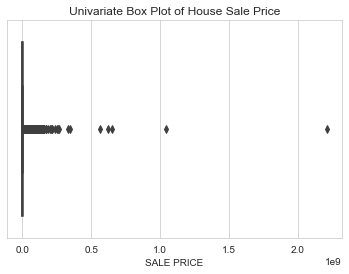

In [20]:
sns.boxplot(x='SALE PRICE', data=df)
plt.title("Univariate Box Plot of House Sale Price")

In [21]:
# The sales prices are positively skewed (right-skewed)
len(df[df['SALE PRICE'] > 169000000])

19

There seems to be 19 houses worth more than \\$169 million which is the most expensive listing in all of NYC \
House sales where the sales price was greater than \\$169 million and less than \\$10 thousand will be dropped as it is not reasonable to have data where the house price is greater than the most expensive listing and less than \\$10,000 \
\
It should also be noted that there are several entries where the sales price is not listed as it was simply a deed transfer within the family or where there was no recorded monetary transaction.

In [22]:
df = df[(df['SALE PRICE'] <= 169000000) & (df['SALE PRICE'] >= 10000)]

Let's explore the YEAR BUILT column to make sure there are no entries with unreasonable data

In [23]:
np.sort(df['YEAR BUILT'].unique())

array([   0, 1111, 1800, 1832, 1835, 1844, 1845, 1846, 1847, 1849, 1850,
       1851, 1852, 1854, 1855, 1856, 1864, 1865, 1870, 1871, 1875, 1880,
       1881, 1882, 1883, 1889, 1890, 1891, 1892, 1893, 1894, 1895, 1896,
       1898, 1899, 1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908,
       1909, 1910, 1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919,
       1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930,
       1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941,
       1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952,
       1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963,
       1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974,
       1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985,
       1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996,
       1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007,
       2008, 2009, 2010, 2011, 2012, 2013, 2014, 20

In [24]:
df["YEAR BUILT"].value_counts()

0       4139
1920    4004
1930    3331
1925    2864
1910    2342
        ... 
1855       1
1111       1
1871       1
1891       1
2017       1
Name: YEAR BUILT, Length: 153, dtype: int64

It makes sense to drop all columns where the YEAR BUILT is before 1800 (dropping 4140 entries)

In [25]:
df = df[(df['YEAR BUILT'] >= 1800)]

In order to add a feature that is the age of the building in years, we will have to extract the year the building was sold and subtract the year the building was built

In [26]:
df['SALE DATE']= pd.to_datetime(df['SALE DATE'], errors='coerce')

In [27]:
df['YEAR SOLD'] = df['SALE DATE'].apply(lambda x: x.year)

In [28]:
df['YEAR SOLD'].value_counts()

2017    35647
2016    18527
Name: YEAR SOLD, dtype: int64

In [29]:
# df['BUILDING AGE IN YEARS'] = df['YEAR SOLD'] - df['YEAR BUILT']

We can now move on to visualizing the data to get a better understanding and intuition of the problem at hand

C:\Users\Prave\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.08, 'DISTRIBUTION PLOT OF ALL HOUSE SALES UNDER $5 MILLION')

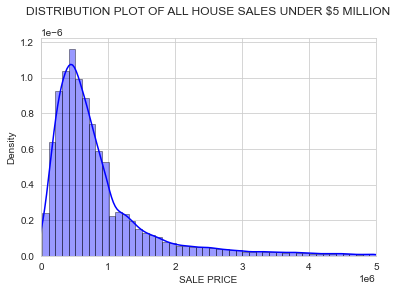

In [30]:
sns.distplot(df[df['SALE PRICE']<=5000000]['SALE PRICE'],hist=True, kde=True, color = 'blue',hist_kws={'edgecolor':'black'})
plt.xlim([0,5000000])
plt.title("DISTRIBUTION PLOT OF ALL HOUSE SALES UNDER $5 MILLION", y= 1.08)

In [31]:
df['SALE PRICE'].skew()

17.59623408153238

In [32]:
median_borough = df.groupby('BOROUGH').median()
median_borough = median_borough.reset_index()
median_borough['BOROUGH'] = median_borough['BOROUGH'].map({1:"Manhattan",2:"Bronx",3:"Brooklyn",4:"Queens",5:"Staten Island"})

Text(0.5, 1.0, 'MEDIAN HOUSE SALE PRICE BY BOROUGH')

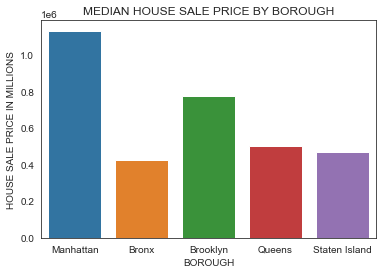

In [33]:
sns.set_style('white')
ax = sns.barplot(x ='BOROUGH',y = 'SALE PRICE',data =median_borough)
ax.set_ylabel("HOUSE SALE PRICE IN MILLIONS")
ax.set_title("MEDIAN HOUSE SALE PRICE BY BOROUGH")

In [34]:
num_borough = df.groupby('BOROUGH').size()
num_borough = num_borough.to_frame()
num_borough = num_borough.reset_index()
num_borough['BOROUGH'] = num_borough['BOROUGH'].map({1:"Manhattan",2:"Bronx",3:"Brooklyn",4:"Queens",5:"Staten Island"})
num_borough.columns = ['BOROUGH', 'count']

Text(0.5, 1.0, 'NUMBER OF HOUSE SALES BY BOROUGH')

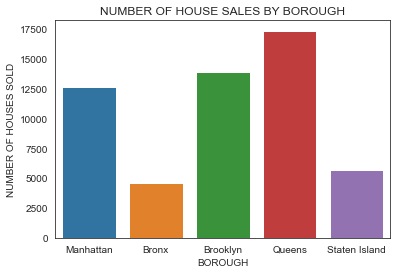

In [35]:
ax = sns.barplot(x ='BOROUGH',y = 'count',data = num_borough)
ax.set_ylabel("NUMBER OF HOUSES SOLD")
ax.set_title("NUMBER OF HOUSE SALES BY BOROUGH")

Now, let us explore the correlation of the features in this dataset to ensure that there are no redundant features which will only add to the complexity of our model

<AxesSubplot:>

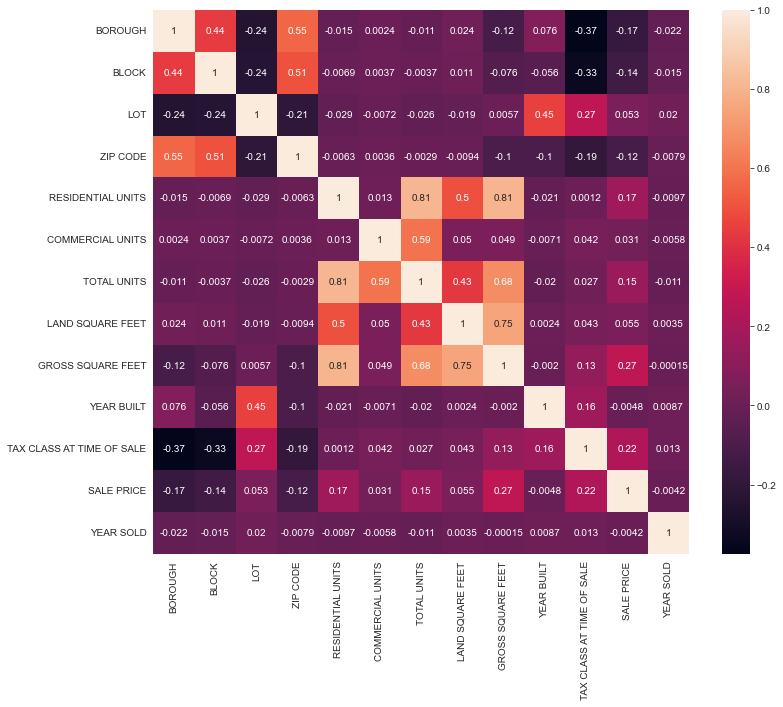

In [36]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot = True)

In [37]:
df.corr()[(abs(df.corr())>0.7) & (df.corr() != 1)].dropna(thresh = 1)

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE,YEAR SOLD
RESIDENTIAL UNITS,NaN,NaN,NaN,NaN,NaN,NaN,0.811853,NaN,0.806017,NaN,NaN,NaN,NaN
TOTAL UNITS,NaN,NaN,NaN,NaN,0.811853,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LAND SQUARE FEET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.749264,NaN,NaN,NaN,NaN
GROSS SQUARE FEET,NaN,NaN,NaN,NaN,0.806017,NaN,NaN,0.749264,NaN,NaN,NaN,NaN,NaN


**Total Units** and **Residential Units** seem to be highly correlated. Maybe we can get rid of one of the two columns. corr = 0.81 \
**Residential Units** and **Gross Square Feet** seem to be highly correlated. corr = 0.81 \
**Total Units** and **Commercial Units** are also somewhat correlated. corr = 0.59 \
**BLOCK** and **BOROUGH** are also somewhat correlated. corr = 0.44

Text(0.5, 1.0, 'Feature Correlation with House Sale Price')

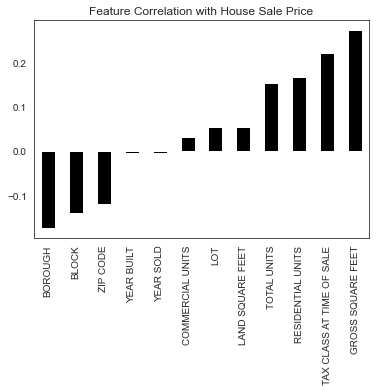

In [38]:
plt.figure(figsize=(6,4))
ax = df.corr()['SALE PRICE'].sort_values().drop('SALE PRICE').plot(kind='bar',color='black')
ax.set_title("Feature Correlation with House Sale Price")

### One hot encoding

We will be proceeding with two different one hot encoding criterion:
1) One hot encode all features with less than 50 unique categories \
2) One hot encode all features with less than 200 unique categories

If there is a noticeable difference in model accuracy due to the additional features, then we will proceed with the 2nd criteria (less than 200 unique categories). Otherwise, we will proceed with the 1st criteria (less than 50 unique categories) in order to keep model complexity low. 

**Criteria 1** One hot encode all columns with less than 50 unique categories

In [39]:
# Non numerical columns remaining
df.select_dtypes(['object']).columns

Index(['NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER',
       'BUILDING CLASS AT TIME OF SALE'],
      dtype='object')

In [40]:
print("Features with less than 50 unique categories")
df.nunique()[df.nunique() < 50]

Features with less than 50 unique categories


BOROUGH                       5
BUILDING CLASS CATEGORY      46
TAX CLASS AT PRESENT         10
COMMERCIAL UNITS             37
TAX CLASS AT TIME OF SALE     3
YEAR SOLD                     2
dtype: int64

String features with a reasonable number of categories (less than 50 was chosen here) should be converted to the pandas category data type as it saves memory and and signals to other python libraries and functions that this column should be treated as a categorical feature

COMMERCIAL UNITS and YEAR SOLD were not selected to be one hot encoded as they are numerical features where an order is relevant. The more commercial units, the more expensive the house. Intuitively, the newer the house, the more expensive it is. 

In [41]:
df['BUILDING CLASS CATEGORY'] = df['BUILDING CLASS CATEGORY'].astype('category')
df['BOROUGH'] = df['BOROUGH'].astype('category')
df['TAX CLASS AT TIME OF SALE'] = df['TAX CLASS AT TIME OF SALE'].astype('category')
df['TAX CLASS AT PRESENT'] = df['TAX CLASS AT PRESENT'].astype('category')

In [42]:
one_hot_cols = ['BOROUGH', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'TAX CLASS AT TIME OF SALE']

In [43]:
one_hot_encode = pd.get_dummies(df[one_hot_cols], drop_first=True)

**Criteria 2** One hot encode all columns with less than 200 unique categories

In [44]:
print("Features with less than 200 unique categories")
df.nunique()[(df.nunique() < 200)]

Features with less than 200 unique categories


BOROUGH                             5
BUILDING CLASS CATEGORY            46
TAX CLASS AT PRESENT               10
BUILDING CLASS AT PRESENT         148
ZIP CODE                          182
RESIDENTIAL UNITS                 136
COMMERCIAL UNITS                   37
TOTAL UNITS                       142
YEAR BUILT                        151
TAX CLASS AT TIME OF SALE           3
BUILDING CLASS AT TIME OF SALE    148
YEAR SOLD                           2
dtype: int64

COMMERICIAL UNITS, YEAR SOLD, RESIDENTIAL UNITS, TOTAL UNITS and YEAR BUILT were not one hot encoded as they are numerical features, where their order makes sense. 



In [45]:
df2 = df.copy()

In [46]:
one_hot_cols_2 = ['BOROUGH', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'TAX CLASS AT TIME OF SALE', \
                'ZIP CODE','BUILDING CLASS AT TIME OF SALE', 'BUILDING CLASS AT PRESENT']

In [47]:
df2['BUILDING CLASS CATEGORY'] = df2['BUILDING CLASS CATEGORY'].astype('category')
df2['BOROUGH'] = df2['BOROUGH'].astype('category')
df2['TAX CLASS AT TIME OF SALE'] = df2['TAX CLASS AT TIME OF SALE'].astype('category')
df2['TAX CLASS AT PRESENT'] = df2['TAX CLASS AT PRESENT'].astype('category')
df2['BUILDING CLASS AT PRESENT'] = df2['BUILDING CLASS AT PRESENT'].astype('category')
df2['BUILDING CLASS AT TIME OF SALE'] = df2['BUILDING CLASS AT TIME OF SALE'].astype('category')
df2['ZIP CODE'] = df2['ZIP CODE'].astype('category')

In [48]:
one_hot_encode_2 = pd.get_dummies(df2[one_hot_cols_2], drop_first=True)

### Final DataFrame for Modeling

Created two final dataframes where df_final corresponds criteria 1 and df_final_2 corresponds to criteria 2

In [49]:
df_final = df.drop(one_hot_cols, axis = 1)
df_final = pd.concat([df_final, one_hot_encode], axis = 1)

In [58]:
df_final_2 = df2.drop(one_hot_cols_2, axis = 1)
df_final_2 = pd.concat([df_final_2, one_hot_encode_2], axis = 1)

In [59]:
df_final.select_dtypes(['object']).columns

Index(['NEIGHBORHOOD', 'BUILDING CLASS AT PRESENT', 'ADDRESS',
       'APARTMENT NUMBER', 'BUILDING CLASS AT TIME OF SALE'],
      dtype='object')

In [60]:
 df_final = df_final.drop(['NEIGHBORHOOD','BUILDING CLASS AT PRESENT','ADDRESS','APARTMENT NUMBER', \
                             'BUILDING CLASS AT TIME OF SALE','SALE DATE'], axis = 1)

In [61]:
df_final_2.select_dtypes(['object']).columns

Index(['NEIGHBORHOOD', 'ADDRESS', 'APARTMENT NUMBER'], dtype='object')

In [62]:
 df_final_2 = df_final_2.drop(['NEIGHBORHOOD','ADDRESS','APARTMENT NUMBER','SALE DATE'], axis = 1)

In [63]:
len(df_final.columns)

71

In [64]:
len(df_final_2.columns)

545

The two dataframes are now ready for modeling. All features are numerical in both dataframes. Dataframe 1 has 70 features and Dataframe 2 has 544 features. 

The same models will be run on both dataframes and the normalized root mean square error will be used as the model evaluation metric to compare the two one hot encoding methodologies. If the normalized root mean square errror does not decrease significantly in the more complicated model (544 features), the simpler model will be chosen due to the complexity-accuracy trade off. \
**Ideally, we want the simplest model that is the most accurate**

### Modeling

First, we form our feature matrix and our label vector and split the data into a train, test split. Here, we are spltting the data 70/30 and specifying a random state to ensure reproducability of results.

**Criteria 1:** Model has 70 features. Will be referred to as Simple Model \
**Critera 2:** Model has 544 features. Will be referred to as Complex Model

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [66]:
X = df_final.drop(['SALE PRICE'],axis=1)
y = df_final['SALE PRICE']

X2 = df_final_2.drop(['SALE PRICE'], axis=1)
y2 = df_final_2['SALE PRICE']

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X2, y2, test_size=0.30, random_state=42)

For the complex model, the features are first normalized

In [68]:
scaler = StandardScaler()
X_train_2 = scaler.fit_transform(X_train_2)
X_test_2 = scaler.transform(X_test_2)

Next, PCA will be applied to reduce the dimensionality of the complex model. As it stands, the complex model has 544 features. We want to reduce the dimensionality while at least explaining 80% of the total variance. 

(0.0, 100.0)

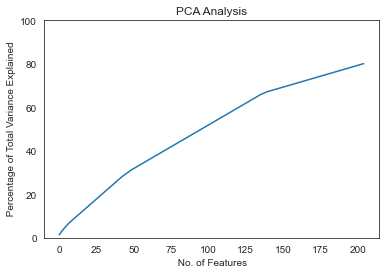

In [80]:
from sklearn.decomposition import PCA
pca = PCA(n_components=205)
principalComponents = pca.fit(X_train_2)

variance = principalComponents.explained_variance_ratio_
var = np.cumsum(np.round(variance, decimals=3)*100)

plt.plot(var)
plt.title("PCA Analysis")
plt.ylabel(' Percentage of Total Variance Explained')
plt.xlabel(' No. of Features')
plt.ylim(0,100)

Apply the mapping to both the training set and the test set. Dimensionality was reduced from 544 features to 205 features while retaining 80% of the total variance.

In [82]:
pca.fit(X_train_2)
X_train_2 = pca.transform(X_train_2)
X_test_2 = pca.transform(X_test_2)

In [83]:
X_train.shape, y_train.shape

((37921, 70), (37921,))

In [84]:
X_test.shape, y_test.shape

((16253, 70), (16253,))

In [85]:
X_train_2.shape, y_train_2.shape

((37921, 205), (37921,))

In [86]:
X_test_2.shape, y_test_2.shape

((16253, 205), (16253,))

In [87]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# Define a function to compute the root mean squared error 
def RMSE(y_test, y_pred):    
    return sqrt(mean_squared_error(y_test,y_pred))

#### Linear Regression

In [88]:
from sklearn import linear_model

linreg_m = linear_model.LinearRegression()
linreg_m2 = linear_model.LinearRegression()
linreg_m.fit(X_train, y_train)
linreg_m2.fit(X_train_2, y_train_2)

y_pred_linreg = linreg_m.predict(X_test)
y_pred_train_linreg = linreg_m.predict(X_train)

y_pred_linreg_2 = linreg_m2.predict(X_test_2)
y_pred_train_linreg_2 = linreg_m2.predict(X_train_2)

NRMSE_linreg_train = RMSE(y_train, y_pred_train_linreg) / y_train.mean()
NRMSE_linreg = RMSE(y_test, y_pred_linreg) / y_test.mean()

NRMSE_linreg_train_2 = RMSE(y_train_2, y_pred_train_linreg_2) / y_train_2.mean()
NRMSE_linreg_2 = RMSE(y_test_2, y_pred_linreg_2) / y_test_2.mean()

print("Simple Model")
print(f"Train RMSE: {NRMSE_linreg_train}")
print(f"Test RMSE: {NRMSE_linreg}")
print()
print("Complex Model")
print(f"Train RMSE: {NRMSE_linreg_train_2}")
print(f"Test RMSE: {NRMSE_linreg_2}")


Simple Model
Train RMSE: 2.652164709669631
Test RMSE: 2.983964825826293

Complex Model
Train RMSE: 2.507358152136674
Test RMSE: 2.8044888400987857


#### Random Forest Regressor

In [89]:
from sklearn.ensemble import RandomForestRegressor
rforest_m = RandomForestRegressor()
rforest_m2 = RandomForestRegressor()

In [90]:
rforest_m.fit(X_train, y_train)
rforest_m2.fit(X_train_2, y_train_2)

y_pred_rforest = rforest_m.predict(X_test)
y_pred_train_rforest = rforest_m.predict(X_train)

y_pred_rforest_2 = rforest_m2.predict(X_test_2)
y_pred_train_rforest_2 = rforest_m2.predict(X_train_2)

In [91]:
rforest_m.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [92]:
NRMSE_rforest_train = RMSE(y_train,y_pred_train_rforest) / y_train.mean()
NRMSE_rforest = RMSE(y_test,y_pred_rforest) / y_test.mean()

NRMSE_rforest_train_2 = RMSE(y_train_2,y_pred_train_rforest_2) / y_train_2.mean()
NRMSE_rforest_2 = RMSE(y_test_2,y_pred_rforest_2) / y_test_2.mean()

print("Simple Model")
print(f"Train RMSE: {NRMSE_rforest_train}")
print(f"Test RMSE: {NRMSE_rforest}")
print()
print("Complex Model")
print(f"Train RMSE: {NRMSE_rforest_train_2}")
print(f"Test RMSE: {NRMSE_rforest_2}")

Simple Model
Train RMSE: 0.8753913079424854
Test RMSE: 2.1274942590689063

Complex Model
Train RMSE: 0.9510970928137537
Test RMSE: 2.3798920123918856


The simpler model outperforms the complex model when a random forest regressor model is used

In [ ]:
# from sklearn.model_selection import GridSearchCV
# parameters = {
#      'n_estimators':(20,60,100), #the number of trees
#      'max_depth':(20,30,50)
# }

# model = GridSearchCV(RandomForestRegressor(),parameters,cv=3)
# model.fit(X_train, y_train)
# model.best_score_, model.best_params_

In [ ]:
# rforest_m_best = RandomForestRegressor(max_depth=30, n_estimators=100)
# rforest_m_best.fit(X_train, y_train)
# y_pred_rforest_best = rforest_m_best.predict(X_test)
# y_pred_train_rforest_best = rforest_m_best.predict(X_train)

In [ ]:
# NRMSE_rforest_train_best = RMSE(y_train,y_pred_train_rforest_best) / y_train.mean()
# NRMSE_rforest_best = RMSE(y_test,y_pred_rforest_best) / y_test.mean()
# print(f"Train RMSE: {NRMSE_rforest_train_best}")
# print(f"Test RMSE: {NRMSE_rforest_best}")

In [93]:
print(f"Percentage improvement in terms of RMSE when comparing the Random Forest Regressor model to the \
Linear Regression Model:\nSimple Model: {round((NRMSE_linreg - NRMSE_rforest) / (NRMSE_linreg)* 100,2)}% \
\nComplex Model: {round((NRMSE_linreg - NRMSE_rforest_2) / (NRMSE_linreg_2)* 100,2)}%")

Percentage improvement in terms of RMSE when comparing the Random Forest Regressor model to the Linear Regression Model:
Simple Model: 28.7% 
Complex Model: 21.54%


Let's look at the seven most important features for this model. (Simple Model)

Text(0.5, 0, 'Relative Importance')

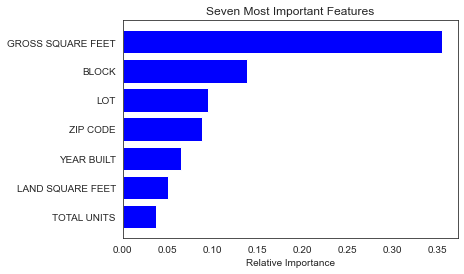

In [94]:
import matplotlib.pyplot as plt
feature_names = [key for key in df_final if not key == 9]
%matplotlib inline
importances = rforest_m.feature_importances_
indices = np.argsort(importances)[-7:]
plt.figure(figsize=(6,4))
plt.title('Seven Most Important Features')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
# plt.yticks(range(len(indices)),feature_names)
plt.yticks(range(len(indices)),np.array(feature_names)[indices])
plt.xlabel('Relative Importance')

#### Neural Network

The data was first normalized to improve training time

In [105]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.constraints import max_norm


scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

A two hidden layer sequential neural network, where the following methodology was used to determine the number of neurons in the hidden layers. This methodology was derived from basic neural network modeling principles: 
- The first hidden layer has ((# of neurons in input layer + # of neurons in output layer) / 2) number of neruons
- The second hidden layer has half the first layer's number of neurons

In [106]:
model = Sequential()

# input layer
model.add(Dense(70,  activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(36, activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(18, activation='relu'))
model.add(Dropout(0.2))

# output layer
model.add(Dense(units=1,activation='relu'))

# Compile model
model.compile(loss='mean_squared_error', optimizer='adam')

In [98]:
model2 = Sequential()

# input layer
model2.add(Dense(205,  activation='relu'))
model2.add(Dropout(0.2))

# hidden layer
model2.add(Dense(103, activation='relu'))
model2.add(Dropout(0.2))

# hidden layer
model2.add(Dense(52, activation='relu'))
model2.add(Dropout(0.2))

# output layer
model2.add(Dense(units=1,activation='relu'))

# Compile model
model2.compile(loss='mean_squared_error', optimizer='adam')

In [107]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=100,
          validation_data=(X_test, y_test), 
          )

Epoch 1/100
1186/1186 [==============================] - 2s 1ms/step - loss: 16498911065992.9512 - val_loss: 23025906876416.0000
Epoch 2/100
1186/1186 [==============================] - 1s 1ms/step - loss: 24671048380992.2695 - val_loss: 22601648832512.0000
Epoch 3/100
1186/1186 [==============================] - 1s 1ms/step - loss: 17448091785476.5293 - val_loss: 22304207667200.0000
Epoch 4/100
1186/1186 [==============================] - 1s 1ms/step - loss: 19456352608469.9453 - val_loss: 22028883066880.0000
Epoch 5/100
1186/1186 [==============================] - 1s 1ms/step - loss: 21837004287030.3477 - val_loss: 21761349386240.0000
Epoch 6/100
1186/1186 [==============================] - 1s 1ms/step - loss: 17196841717156.1250 - val_loss: 21456255713280.0000
Epoch 7/100
1186/1186 [==============================] - 1s 1ms/step - loss: 19849203964730.4453 - val_loss: 21190764658688.0000
Epoch 8/100
1186/1186 [==============================] - 1s 1ms/step - loss: 17063331753221.3926 

1186/1186 [==============================] - 1s 1ms/step - loss: 14515508860070.4961 - val_loss: 16592083615744.0000
Epoch 65/100
1186/1186 [==============================] - 1s 1ms/step - loss: 12441714360927.3262 - val_loss: 16570911817728.0000
Epoch 66/100
1186/1186 [==============================] - 1s 1ms/step - loss: 14304417167378.9785 - val_loss: 16576382238720.0000
Epoch 67/100
1186/1186 [==============================] - 1s 1ms/step - loss: 14432989791629.6953 - val_loss: 16562717196288.0000
Epoch 68/100
1186/1186 [==============================] - 1s 1ms/step - loss: 12836117204139.6738 - val_loss: 16553097560064.0000
Epoch 69/100
1186/1186 [==============================] - 1s 1ms/step - loss: 14347745307702.3496 - val_loss: 16546044837888.0000
Epoch 70/100
1186/1186 [==============================] - 1s 1ms/step - loss: 15789098094208.9707 - val_loss: 16557593853952.0000
Epoch 71/100
1186/1186 [==============================] - 1s 1ms/step - loss: 12584838881852.8184 - val

In [109]:
model2.fit(x=X_train_2, 
          y=y_train_2, 
          epochs=20,
          validation_data=(X_test_2, y_test_2), 
          )

Epoch 1/20
1186/1186 [==============================] - 3s 2ms/step - loss: 10024152727552.0000 - val_loss: 15102465015808.0000
Epoch 2/20
1186/1186 [==============================] - 3s 2ms/step - loss: 10048950501376.0000 - val_loss: 15120260399104.0000
Epoch 3/20
1186/1186 [==============================] - 3s 2ms/step - loss: 10128757620736.0000 - val_loss: 15311749251072.0000
Epoch 4/20
1186/1186 [==============================] - 3s 2ms/step - loss: 10033888755712.0000 - val_loss: 15485217275904.0000
Epoch 5/20
1186/1186 [==============================] - 3s 2ms/step - loss: 10095819751424.0000 - val_loss: 15378972409856.0000: 0s - loss: 100878495
Epoch 6/20
1186/1186 [==============================] - 3s 2ms/step - loss: 9982368022528.0000 - val_loss: 15714595373056.0000
Epoch 7/20
1186/1186 [==============================] - 3s 2ms/step - loss: 10057202794496.0000 - val_loss: 15538924290048.0000
Epoch 8/20
1186/1186 [==============================] - 3s 2ms/step - loss: 1004525

In [110]:
y_pred_train = model.predict(X_train)
y_pred = model.predict(X_test)

y_pred_train_2 = model2.predict(X_train_2)
y_pred_2 = model2.predict(X_test_2)


NRMSE_NN = RMSE(y_test,y_pred) / y_test.mean() 
NRMSE_NN_train = RMSE(y_train,y_pred_train) / y_train.mean()

NRMSE_NN_2 = RMSE(y_test_2,y_pred_2) / y_test_2.mean() 
NRMSE_NN_train_2 = RMSE(y_train_2,y_pred_train_2) / y_train_2.mean()

print("Simple Model")
print(f"Train Normalized RMSE: {NRMSE_NN_train}")
print(f"Test Normalized RMSE: {NRMSE_NN}")
print()
print("Complex Model")
print(f"Train Normalized RMSE: {NRMSE_NN_train_2}")
print(f"Test Normalized RMSE: {NRMSE_NN_2}")

Simple Model
Train Normalized RMSE: 2.6550657537387825
Test Normalized RMSE: 2.9339416085047287

Complex Model
Train Normalized RMSE: 2.2178926876211444
Test Normalized RMSE: 2.862900811490843


#### Lasso Regression

In [111]:
# Performs L1 regularization, i.e. adds penalty equivalent to absolute value of the magnitude of coefficients
lassoreg_m = linear_model.Lasso(alpha=0.001,max_iter=10000)
lassoreg_m.fit(X_train, y_train)

lassoreg_m2 = linear_model.Lasso(alpha=0.001,max_iter=10000)
lassoreg_m2.fit(X_train_2, y_train_2)

y_pred_lasso=lassoreg_m.predict(X_test)
y_pred_lasso_train = lassoreg_m.predict(X_train)

y_pred_lasso_2=lassoreg_m2.predict(X_test_2)
y_pred_lasso_train_2 = lassoreg_m2.predict(X_train_2)

NRMSE_LR = RMSE(y_test,y_pred_lasso) / y_test.mean() 
NRMSE_LR_train = RMSE(y_train,y_pred_lasso_train) / y_train.mean()
NRMSE_LR_2 = RMSE(y_test_2,y_pred_lasso_2) / y_test_2.mean() 
NRMSE_LR_train_2 = RMSE(y_train_2,y_pred_lasso_train_2) / y_train_2.mean()

print("Simplex Model")
print(f"Train Normalized RMSE: {NRMSE_LR_train}")
print(f"Test Normalized RMSE: {NRMSE_LR}")
print()
print("Complex Model")
print(f"Train Normalized RMSE: {NRMSE_LR_train_2}")
print(f"Test Normalized RMSE: {NRMSE_LR_2}")

C:\Users\Prave\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.4442369228291082e+17, tolerance: 73822199580219.17
  model = cd_fast.enet_coordinate_descent(


Simplex Model
Train Normalized RMSE: 2.6524272040741264
Test Normalized RMSE: 2.9850468143454147

Complex Model
Train Normalized RMSE: 2.507358152136674
Test Normalized RMSE: 2.804488839887882


#### Ridge Regression

In [113]:
# Performs L2 regularization, i.e. adds penalty equivalent to square of the magnitude of coefficients
ridgereg_m = linear_model.Ridge(alpha=0.001, normalize=True)
ridgereg_m.fit(X_train, y_train)
ridgereg_m2 = linear_model.Ridge(alpha=0.001, normalize=True)
ridgereg_m2.fit(X_train_2, y_train_2)

y_pred_ridge = ridgereg_m.predict(X_test)
y_pred_ridge_train = ridgereg_m.predict(X_train)
y_pred_ridge_2 = ridgereg_m2.predict(X_test_2)
y_pred_ridge_train_2 = ridgereg_m2.predict(X_train_2)

NRMSE_RR = RMSE(y_test,y_pred_ridge) / y_test.mean() 
NRMSE_RR_train = RMSE(y_train,y_pred_ridge_train) / y_train.mean()
NRMSE_RR_2 = RMSE(y_test_2,y_pred_ridge_2) / y_test_2.mean() 
NRMSE_RR_train_2 = RMSE(y_train_2,y_pred_ridge_train_2) / y_train_2.mean()

print("Simple Model")
print(f"Train Normalized RMSE: {NRMSE_RR_train}")
print(f"Test Normalized RMSE: {NRMSE_RR}")
print()
print("Complex Model")
print(f"Train Normalized RMSE: {NRMSE_RR_train_2}")
print(f"Test Normalized RMSE: {NRMSE_RR_2}")

Simple Model
Train Normalized RMSE: 2.6533578486959835
Test Normalized RMSE: 2.988633358195441

Complex Model
Train Normalized RMSE: 2.507359015175691
Test Normalized RMSE: 2.804317500234512


#### Elastic Net

In [115]:
# ElasticNet is hybrid of Lasso and Ridge Regression techniques
elasticnet_m = linear_model.ElasticNet(normalize=False, max_iter = 100000)
elasticnet_m.fit(X_train, y_train)
elasticnet_m2 = linear_model.ElasticNet(normalize=False, max_iter = 100000)
elasticnet_m2.fit(X_train_2, y_train_2)

y_pred_en = elasticnet_m.predict(X_test)
y_pred_en_train = elasticnet_m.predict(X_train)
y_pred_en_2 = elasticnet_m2.predict(X_test_2)
y_pred_en_train_2 = elasticnet_m2.predict(X_train_2)

NRMSE_EN = RMSE(y_test,y_pred_en) / y_test.mean() 
NRMSE_EN_train = RMSE(y_train,y_pred_en_train) / y_train.mean()
NRMSE_EN_2 = RMSE(y_test_2,y_pred_en_2) / y_test_2.mean() 
NRMSE_EN_train_2 = RMSE(y_train_2,y_pred_en_train_2) / y_train_2.mean()

print("Simple Model")
print(f"Train Normalized RMSE: {NRMSE_EN_train}")
print(f"Test Normalized RMSE: {NRMSE_EN}")
print()
print("Complex Model")
print(f"Train Normalized RMSE: {NRMSE_EN_train_2}")
print(f"Test Normalized RMSE: {NRMSE_EN_2}")

Simple Model
Train Normalized RMSE: 3.203253931401851
Test Normalized RMSE: 3.382412360649635

Complex Model
Train Normalized RMSE: 2.527339111892294
Test Normalized RMSE: 2.8122316295442618


#### kNN Regression

In [116]:
from sklearn.neighbors import KNeighborsRegressor

In [117]:
nrmse_val_knn = []
K_val = []
for K in range(10):
    K = K+1
    knn = KNeighborsRegressor(n_neighbors = K)
    knn.fit(X_train, y_train)  #fit the model
    y_pred_knn =knn.predict(X_test) #make prediction on test set
    NRMSE_knn = RMSE(y_test, y_pred_knn) / y_test.mean() #calculate rmse
    nrmse_val_knn.append(NRMSE_knn)
    K_val.append(K)
    print('RMSE value for k= ' , K , 'is:', NRMSE_knn)

RMSE value for k=  1 is: 3.1779915802425442
RMSE value for k=  2 is: 2.979578799881089
RMSE value for k=  3 is: 2.9364884449362165
RMSE value for k=  4 is: 2.8580323348562113
RMSE value for k=  5 is: 2.8008325748724454
RMSE value for k=  6 is: 2.783685882483552
RMSE value for k=  7 is: 2.7978498064165565
RMSE value for k=  8 is: 2.769883899068683
RMSE value for k=  9 is: 2.778928697651971
RMSE value for k=  10 is: 2.791955428391237


In [118]:
nrmse_val_knn_2 = []
K_val_2 = []
for K in range(10):
    K = K+1
    knn2 = KNeighborsRegressor(n_neighbors = K)
    knn2.fit(X_train_2, y_train_2)  #fit the model
    y_pred_knn_2 =knn2.predict(X_test_2) #make prediction on test set
    NRMSE_knn_2 = RMSE(y_test_2, y_pred_knn_2) / y_test_2.mean() #calculate rmse
    nrmse_val_knn_2.append(NRMSE_knn_2)
    K_val_2.append(K)
    print('RMSE value for k= ' , K , 'is:', NRMSE_knn_2)

RMSE value for k=  1 is: 3.0292661623185677
RMSE value for k=  2 is: 2.830300211998746
RMSE value for k=  3 is: 2.764804513710072
RMSE value for k=  4 is: 2.7561902097020705
RMSE value for k=  5 is: 2.7574429790478057
RMSE value for k=  6 is: 2.765992796211946
RMSE value for k=  7 is: 2.754888833740065
RMSE value for k=  8 is: 2.726875972771394
RMSE value for k=  9 is: 2.7330477746415816
RMSE value for k=  10 is: 2.751527835166091


Text(0, 0.5, 'Normalised RMSE')

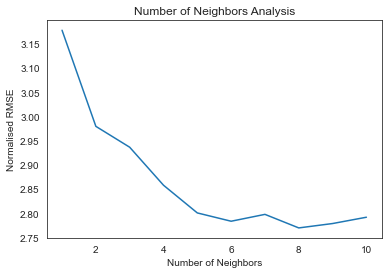

In [119]:
#Plot the NRMSE Value against the k value
plt.plot(K_val,nrmse_val_knn)
plt.title("Number of Neighbors Analysis (Simple Model)")
plt.xlabel("Number of Neighbors")
plt.ylabel("Normalised RMSE")

Based on above RMSE values, we are going to choose k  = 8 because it shows the lowest RMSE value.

Text(0, 0.5, 'Normalised RMSE')

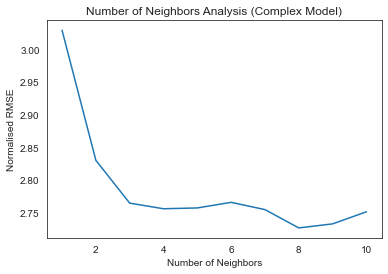

In [120]:
#Plot the NRMSE Value against the k value
plt.plot(K_val_2,nrmse_val_knn_2)
plt.title("Number of Neighbors Analysis (Complex Model)")
plt.xlabel("Number of Neighbors")
plt.ylabel("Normalised RMSE")

Based on above RMSE values, we are going to choose k  = 8 because it shows the lowest RMSE value.

In [125]:
K = 8
knn = KNeighborsRegressor(n_neighbors = K)
knn.fit(X_train, y_train)  #fit the model
y_pred_knn =knn.predict(X_test) #make prediction on test set
y_pred_knn_train =knn.predict(X_train) #make prediction on train set
NRMSE_knn = RMSE(y_test, y_pred_knn) / y_test.mean() #calculate rmse
NRMSE_knn_train = RMSE(y_train, y_pred_knn_train) / y_test.mean() #calculate rmse for train

In [126]:
K = 8
knn2 = KNeighborsRegressor(n_neighbors = K)
knn2.fit(X_train_2, y_train_2)  #fit the model
y_pred_knn_2 =knn2.predict(X_test_2) #make prediction on test set
y_pred_knn_train_2 =knn2.predict(X_train_2) #make prediction on train set
NRMSE_knn_2 = RMSE(y_test_2, y_pred_knn_2) / y_test_2.mean() #calculate rmse
NRMSE_knn_train_2 = RMSE(y_train_2, y_pred_knn_train_2) / y_test_2.mean() #calculate rmse for train

In [127]:
print("Simple Model")
print(f"Train NRMSE: {NRMSE_knn_train}")
print(f"Test NRMSE: {NRMSE_knn}")
print()
print("Complex Model")
print(f"Train NRMSE: {NRMSE_knn_train_2}")
print(f"Test NRMSE: {NRMSE_knn_2}")

Simple Model
Train NRMSE: 2.3140632735732547
Test NRMSE: 2.769883899068683

Complex Model
Train NRMSE: 2.3565090619719755
Test NRMSE: 2.726875972771394


#### Decision Tree Regressor

In [128]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
dectregressor = DecisionTreeRegressor()
dectregressor.fit(X_train, y_train)
dectregressor2 = DecisionTreeRegressor()
dectregressor2.fit(X_train_2, y_train_2)

DecisionTreeRegressor()

In [129]:
y_pred_dec_train = dectregressor.predict(X_train)
y_pred_dec = dectregressor.predict(X_test)
NRMSE_dec = RMSE(y_test, y_pred_dec) / y_test.mean() #calculate rmse
NRMSE_dec_train = RMSE(y_train, y_pred_dec_train) / y_test.mean() #calculate rmse for train

In [131]:
y_pred_dec_train_2 = dectregressor2.predict(X_train_2)
y_pred_dec_2 = dectregressor2.predict(X_test_2)
NRMSE_dec_2 = RMSE(y_test_2, y_pred_dec_2) / y_test_2.mean() #calculate rmse
NRMSE_dec_train_2 = RMSE(y_train_2, y_pred_dec_train_2) / y_test_2.mean() #calculate rmse for train

In [132]:
print("Simple Model")
print(f"Train NRMSE: {NRMSE_dec_train}")
print(f"Test NRMSE: {NRMSE_dec}")
print()
print("Complex Model")
print(f"Train NRMSE: {NRMSE_dec_train_2}")
print(f"Test NRMSE: {NRMSE_dec_2}")

Simple Model
Train NRMSE: 0.2704463713190877
Test NRMSE: 2.7186181654378503

Complex Model
Train NRMSE: 0.2704463713190877
Test NRMSE: 2.848475588041637


This decision tree model might be over overfitting as the NRMSE of the train model is very small relative to the NRMSE of the test model

#### Gradient Boosting Regression

We can create Gradient Boosting Regression and improve the model through looking for the most optimum maximum tree depth value

In [133]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor

nrmse_val_gbr = []
max_depth_val = []

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

for depth in range(2,8):
    gbr_params = {'n_estimators': 1000,
              'max_depth': depth,
              'min_samples_split': 5,
              'learning_rate': 0.01,
              'loss': 'ls'}
    # Create an instance of gradient boosting regressor
    gbr = GradientBoostingRegressor(**gbr_params)
    gbr.fit(X_train_std, y_train)
    
    #Predict the y value from the test data
    y_predict_gbr = gbr.predict(X_test_std)
    
    #Calculate the Normalized RMSE
    NRMSE_GBR = RMSE(y_test, y_predict_gbr) / y_test.mean() #calculate rmse
    
    max_depth_val.append(depth)
    nrmse_val_gbr.append(NRMSE_GBR)
    print('NRMSE value for maximum tree depth = ' , depth , 'is:', NRMSE_GBR)

NRMSE value for maximum tree depth=  2 is: 2.3989587789012505
NRMSE value for maximum tree depth=  3 is: 2.2949836586101986
NRMSE value for maximum tree depth=  4 is: 2.2369270060526176
NRMSE value for maximum tree depth=  5 is: 2.189046442135351
NRMSE value for maximum tree depth=  6 is: 2.21994123345714
NRMSE value for maximum tree depth=  7 is: 2.2209565668568856


Text(0, 0.5, 'Normalized RMSE')

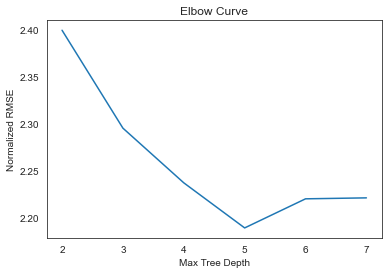

In [142]:
#Plot the NRMSE Value against the k value
curve = pd.DataFrame(nrmse_val_gbr) #elbow curve 
plt.plot(max_depth_val,nrmse_val_gbr)
plt.title("Elbow Curve")
plt.xlabel("Max Tree Depth")
plt.ylabel("Normalized RMSE")

Based on the plot above, the optimum value of the maximum depth tree depth variable is 5. This model could be further improved by increasing the number of trees (n_estimator), learning rate (learning_rate), and choosing another loss function (loss). 

However, changing these variables will have an effect to the computing time, because this model creates the trees sequentially. 

**WARNING: The code below takes a long time to compute**

In [146]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor

nrmse_val_gbr_2 = []
max_depth_val_2 = []

sc = StandardScaler()
X_train_std_2 = sc.fit_transform(X_train_2)
X_test_std_2 = sc.transform(X_test_2)

for depth in range(2,8):
    gbr_params = {'n_estimators': 100,
              'max_depth': depth,
              'min_samples_split': 5,
              'learning_rate': 0.1,
              'loss': 'ls'}
    # Create an instance of gradient boosting regressor
    gbr2 = GradientBoostingRegressor(**gbr_params)
    gbr2.fit(X_train_std_2, y_train_2)
    
    #Predict the y value from the test data
    y_predict_gbr_2 = gbr2.predict(X_test_std_2)
    
    #Calculate the Normalized RMSE
    NRMSE_GBR_2 = RMSE(y_test_2, y_predict_gbr_2) / y_test_2.mean() #calculate rmse
    
    max_depth_val_2.append(depth)
    nrmse_val_gbr_2.append(NRMSE_GBR_2)
    print('NRMSE value for maximum tree depth = ' , depth , 'is:', NRMSE_GBR_2)

NRMSE value for maximum tree depth =  2 is: 2.6894872821354885
NRMSE value for maximum tree depth =  3 is: 2.662995231185586
NRMSE value for maximum tree depth =  4 is: 2.5685288681232956
NRMSE value for maximum tree depth =  5 is: 2.6009342255241523
NRMSE value for maximum tree depth =  6 is: 2.534169504499126
NRMSE value for maximum tree depth =  7 is: 2.537023551526245


Text(0, 0.5, 'Normalized RMSE')

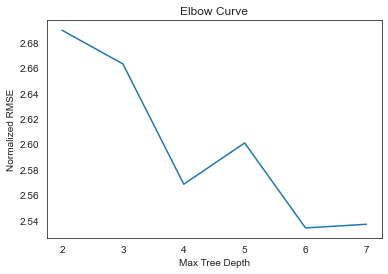

In [147]:
#Plot the NRMSE Value against the k value
curve2 = pd.DataFrame(nrmse_val_gbr_2) #elbow curve 
plt.plot(max_depth_val_2,nrmse_val_gbr_2)
plt.title("Elbow Curve")
plt.xlabel("Max Tree Depth")
plt.ylabel("Normalized RMSE")

In [148]:
depth = 5
gbr_params = {'n_estimators': 1000,
          'max_depth': depth,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}

depth2 = 6
gbr2_params = {'n_estimators': 100,
          'max_depth': depth,
          'min_samples_split': 5,
          'learning_rate': 0.1,
          'loss': 'ls'}
#
# Create an instance of gradient boosting regressor
gbr = GradientBoostingRegressor(**gbr_params)
gbr.fit(X_train_std, y_train)

gbr2 = GradientBoostingRegressor(**gbr2_params)
gbr2.fit(X_train_std_2, y_train_2)

GradientBoostingRegressor(max_depth=5, min_samples_split=5)

In [150]:
y_predict_gbr = gbr.predict(X_test_std)
y_predict_gbr_train =  gbr.predict(X_train_std)

y_predict_gbr_2 = gbr2.predict(X_test_std_2)
y_predict_gbr_train_2 =  gbr2.predict(X_train_std_2)

In [151]:
NRMSE_GBR = RMSE(y_test, y_predict_gbr) / y_test.mean() #calculate rmse
NRMSE_GBR_train = RMSE(y_train, y_predict_gbr_train) / y_test.mean() #calculate rmse for train

NRMSE_GBR_2 = RMSE(y_test_2, y_predict_gbr_2) / y_test_2.mean() #calculate rmse
NRMSE_GBR_train_2 = RMSE(y_train_2, y_predict_gbr_train_2) / y_test_2.mean() #calculate rmse for train

In [152]:
print("Simple Model")
print(f"Train NRMSE: {NRMSE_GBR_train}")
print(f"Test NRMSE: {NRMSE_GBR}")
print()
print("Complex Model")
print(f"Train NRMSE: {NRMSE_GBR_train_2}")
print(f"Test NRMSE: {NRMSE_GBR_2}")

Simple Model
Train NRMSE: 1.2790819738018986
Test NRMSE: 2.1922242562811873

Complex Model
Train NRMSE: 1.087173955890977
Test NRMSE: 2.5945118748887688


Now let's take a look the most important features for this model. (Simple Model)

Text(0.5, 0, 'Relative Importance')

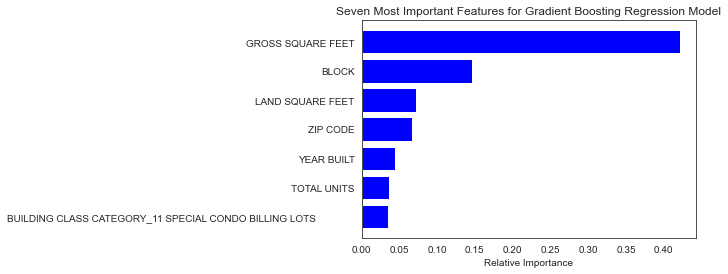

In [153]:
import matplotlib.pyplot as plt
feature_names = [key for key in df_final if not key == 9]
%matplotlib inline
importances = gbr.feature_importances_
indices = np.argsort(importances)[-7:]
plt.figure(figsize=(6,4))
plt.title('Seven Most Important Features for Gradient Boosting Regression Model')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)),np.array(feature_names)[indices])
plt.xlabel('Relative Importance')

The most important variables are the **Gross Square Feet** and **Block**

In [164]:
error_matrix_simple = np.array([[NRMSE_linreg, NRMSE_linreg_train],
             [NRMSE_LR, NRMSE_LR_train],
             [NRMSE_RR, NRMSE_RR_train],
             [NRMSE_EN, NRMSE_EN_train],
             [NRMSE_knn,NRMSE_knn_train],
             [NRMSE_dec, NRMSE_dec_train],
             [NRMSE_rforest, NRMSE_rforest_train],
             [NRMSE_GBR, NRMSE_GBR_train],
             [NRMSE_NN, NRMSE_NN_train]])


cols = ['Normalized Test RMSE', 'Normalized Training RMSE']
models = ['Linear Regression','Lasso Regression','Ridge Regression', 'Elastic Net Regression', \
          'kNN Regression','Decision Tree','Random Forest', 'Gradient Boosting Regression', \
          'Neural Network']
print("SIMPLE MODEL")
model_eval_simple = pd.DataFrame(data = error_matrix_simple, columns = cols, index = models)
model_eval_simple

SIMPLE MODEL


,Normalized Test RMSE,Normalized Training RMSE
Linear Regression,2.983965,2.652165
Lasso Regression,2.985047,2.652427
Ridge Regression,2.988633,2.653358
Elastic Net Regression,3.382412,3.203254
kNN Regression,2.769884,2.314063
Decision Tree,2.718618,0.270446
Random Forest,2.127494,0.875391
Gradient Boosting Regression,2.192224,1.279082
Neural Network,2.933942,2.655066


In [162]:
error_matrix_complex = np.array([[NRMSE_linreg_2, NRMSE_linreg_train_2],
             [NRMSE_LR_2, NRMSE_LR_train_2],
             [NRMSE_RR_2, NRMSE_RR_train_2],
             [NRMSE_EN_2, NRMSE_EN_train_2],
             [NRMSE_knn_2,NRMSE_knn_train_2],
             [NRMSE_dec_2, NRMSE_dec_train_2],
             [NRMSE_rforest_2, NRMSE_rforest_train_2],
             [NRMSE_GBR_2, NRMSE_GBR_train_2],
             [NRMSE_NN_2, NRMSE_NN_train_2]])

print("COMPLEX MODEL")
model_eval_complex = pd.DataFrame(data = error_matrix_complex, columns = cols, index = models)
model_eval_complex

COMPLEX MODEL


,Normalized Test RMSE,Normalized Training RMSE
Linear Regression,2.804489,2.507358
Lasso Regression,2.804489,2.507358
Ridge Regression,2.804318,2.507359
Elastic Net Regression,2.812232,2.527339
kNN Regression,2.726876,2.356509
Decision Tree,2.848476,0.270446
Random Forest,2.379892,0.951097
Gradient Boosting Regression,2.594512,1.087174
Neural Network,2.862901,2.217893


In [183]:
simple_vs_complex = pd.DataFrame(data=np.array([error_matrix_simple[:,0],error_matrix_complex[:,0]]).transpose(),\
                    columns = ['Simple Model', 'Complex Model'],index = models)
simple_vs_complex

,Simple Model,Complex Model
Linear Regression,2.983965,2.804489
Lasso Regression,2.985047,2.804489
Ridge Regression,2.988633,2.804318
Elastic Net Regression,3.382412,2.812232
kNN Regression,2.769884,2.726876
Decision Tree,2.718618,2.848476
Random Forest,2.127494,2.379892
Gradient Boosting Regression,2.192224,2.594512
Neural Network,2.933942,2.862901


The following models are the learning models where the Simple Model outperforms the Complex Model

In [169]:
for i in model_eval_simple[model_eval_simple < model_eval_complex]['Normalized Test RMSE'].dropna().index:
    print(i)

Decision Tree
Random Forest
Gradient Boosting Regression


The following models are the learning models where the Complex Model outperforms the Simple Model

In [170]:
for i in model_eval_simple[model_eval_simple > model_eval_complex]['Normalized Test RMSE'].dropna().index:
    print(i)

Linear Regression
Lasso Regression
Ridge Regression
Elastic Net Regression
kNN Regression
Neural Network


In [199]:
print(f"SIMPLE MODEL: {simple_vs_complex['Simple Model'].idxmin()}, NRMSE Test: {round(simple_vs_complex['Simple Model'].min(),4)}")
print(f"COMPLEX MODEL: {simple_vs_complex['Complex Model'].idxmin()}, NRMSE Test: {round(simple_vs_complex['Complex Model'].min(),4)}")

SIMPLE MODEL: Random Forest, NRMSE Test: 2.1275
COMPLEX MODEL: Random Forest, NRMSE Test: 2.3799


**The best model is the Random Forest Regressor Model using the Simple Model Methodolody (one hot encode columns with less than 50 unique categories)**

Text(0.5, 1.0, 'Model Evaluation')

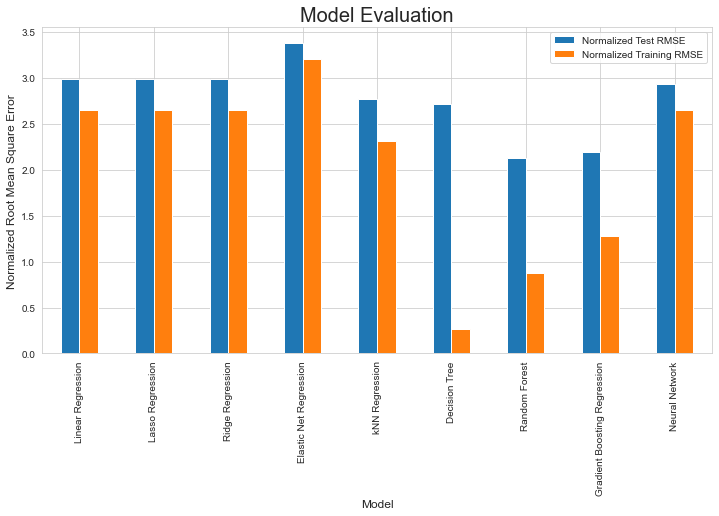

In [159]:
sns.set_style("whitegrid")
model_eval_simple.plot(kind="bar", figsize=(12,6))
plt.xlabel("Model",fontsize = 12)
plt.ylabel("Normalized Root Mean Square Error",fontsize = 12)
plt.title("Model Evaluation", fontsize = 20)

**The above plot compares the Normalized Test and Training Root Mean Squared Errors of the nine different learning models using the Simple Model Methodology (one hot encode less all categorical features with less than 50 unique categories)**